In [17]:
from tweepy import API 
from tweepy import OAuthHandler

In [18]:
from textblob import TextBlob

In [19]:
import twitter_credentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [20]:
# Function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [21]:
# Function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [22]:
#Twitter Authentication
auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)    

In [23]:
twitter_client = API(auth)

In [24]:
#Taking 200 tweets from Elon Musk timiline.
tweets = twitter_client.user_timeline( id="elonmusk",count=200)

In [25]:
# Print the last 5 tweets
print("Show the 10 recent tweets:\n")
i=1
for tweet in tweets[:10]:
    print(str(i) +') '+ tweet.text + '\n')
    i= i+1

Show the 10 recent tweets:

1) @Tesmanian_com 🇩🇪 🚘 ♥️ Geil! ♥️ 🚘 🇩🇪

2) Do you want Tesla to accept Doge?

3) @tculpan Exactly

4) SNL Monologue
https://t.co/b2cvFGqVFF

5) Thanks again to @nbcsnl cast, writers &amp; crew! Honor &amp; pleasure to do the show with you.

6) @MileyCyrus @Grimezsz 🤣🤣

7) @DynamicWebPaige Haha

8) @blockfolio 🤣🤣

9) @EvaFoxU @mayemusk Absolutely

10) @Model3Owners I love Dieter



In [26]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.text for tweet in tweets], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@Tesmanian_com 🇩🇪 🚘 ♥️ Geil! ♥️ 🚘 🇩🇪
1,Do you want Tesla to accept Doge?
2,@tculpan Exactly
3,SNL Monologue\nhttps://t.co/b2cvFGqVFF
4,"Thanks again to @nbcsnl cast, writers &amp; cr..."


In [27]:
# Clean the tweets
df['Tweets'] = np.array([cleanTxt(tweet) for tweet in df['Tweets']])

In [28]:
# Show the cleaned tweets
df

,Tweets
0,_com 🇩🇪 🚘 ♥️ Geil! ♥️ 🚘 🇩🇪
1,Do you want Tesla to accept Doge?
2,Exactly
3,SNL Monologue\n
4,"Thanks again to cast, writers &amp; crew! Hon..."
...,...
195,688 5 Certainly one of the largest. A company...
196,Doge Barking at the Moon
197,Doge Barking at the Moon – Miro
198,"5 While perhaps obvious in hindsight, it turn..."


In [29]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = np.array([TextBlob(tweet).sentiment.subjectivity for tweet in df['Tweets']])
df['Polarity'] = np.array([TextBlob(tweet).sentiment.polarity for tweet in df['Tweets']])
df

,Tweets,Subjectivity,Polarity
0,_com 🇩🇪 🚘 ♥️ Geil! ♥️ 🚘 🇩🇪,0.000000,0.000000
1,Do you want Tesla to accept Doge?,0.000000,0.000000
2,Exactly,0.250000,0.250000
3,SNL Monologue\n,0.000000,0.000000
4,"Thanks again to cast, writers &amp; crew! Hon...",0.200000,0.250000
...,...,...,...
195,688 5 Certainly one of the largest. A company...,0.571429,0.214286
196,Doge Barking at the Moon,0.000000,0.000000
197,Doge Barking at the Moon – Miro,0.000000,0.000000
198,"5 While perhaps obvious in hindsight, it turn...",0.750000,0.000000


In [30]:
#Analysis of tweets.
df['Analysis'] = np.array([getAnalysis(value) for value in df['Polarity']])
df

,Tweets,Subjectivity,Polarity,Analysis
0,_com 🇩🇪 🚘 ♥️ Geil! ♥️ 🚘 🇩🇪,0.000000,0.000000,Neutral
1,Do you want Tesla to accept Doge?,0.000000,0.000000,Neutral
2,Exactly,0.250000,0.250000,Positive
3,SNL Monologue\n,0.000000,0.000000,Neutral
4,"Thanks again to cast, writers &amp; crew! Hon...",0.200000,0.250000,Positive
...,...,...,...,...
195,688 5 Certainly one of the largest. A company...,0.571429,0.214286,Positive
196,Doge Barking at the Moon,0.000000,0.000000,Neutral
197,Doge Barking at the Moon – Miro,0.000000,0.000000,Neutral
198,"5 While perhaps obvious in hindsight, it turn...",0.750000,0.000000,Neutral


In [32]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     96
Positive    95
Negative     9
Name: Analysis, dtype: int64

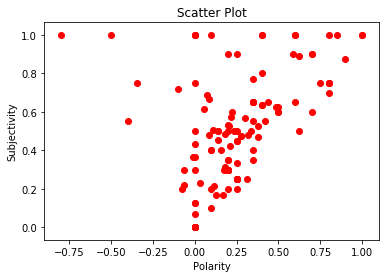

In [38]:
#plotting scatter plot
plt.title("Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.scatter(df['Polarity'],df['Subjectivity'],color='red')
plt.show()

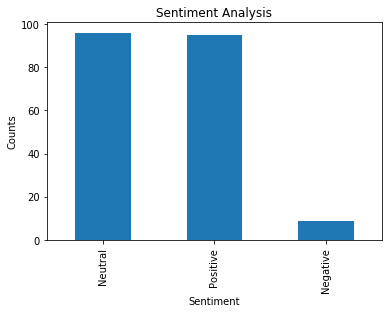

In [39]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()